<a href="https://colab.research.google.com/github/noor60/-Color-classification-using-CNN/blob/main/Colour_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import tkinter as tk
from tkinter import filedialog
from tensorflow.keras.models import Sequential

In [ ]:
import pathlib
import os
data_dir = './data' #my data is in content data folder. data--> trian dataset
classes = os.listdir(data_dir + "/train") # inside the train folder we have 11  folders --> 11 colours

print(classes)
test_dir = './data/test'
from google.colab import files #i had some more directory so i removed it
%rmdir '/content/data/train/.ipynb_checkpoints'
classes = os.listdir(data_dir + "/train") # inside the train folder we have 11  folders --> 11 colours
print(classes)

img_height = 64
img_width = 64
batch_size=16
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)



['white', 'black']
rmdir: failed to remove '/content/data/train/.ipynb_checkpoints': No such file or directory
['white', 'black']
Found 949 files belonging to 3 classes.
Using 760 files for training.
Found 949 files belonging to 3 classes.
Using 189 files for validation.


In [ ]:
num_classes=2

print(num_classes)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=3
mymodel = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/3


InvalidArgumentError: ignored

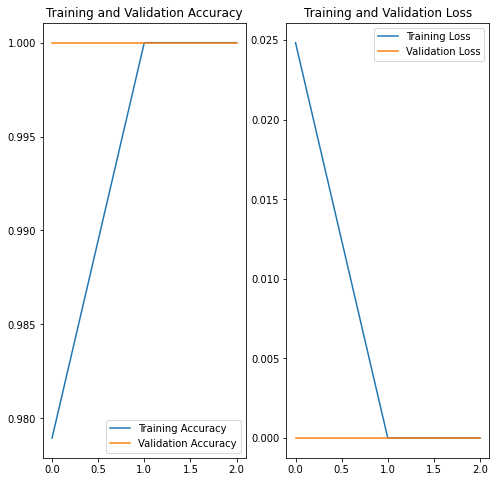

In [ ]:
acc = mymodel.history['accuracy']
val_acc = mymodel.history['val_accuracy']

loss = mymodel.history['loss']
val_loss = mymodel.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import os
import tkinter as tk
import matplotlib as mpl
if os.environ.get('DISPLAY','') == '':
    print('no display found. Using non-interactive Agg backend')
    mpl.use('Agg')
import matplotlib.pyplot as plt


no display found. Using non-interactive Agg backend


In [ ]:
!apt-get install -y xvfb # Install X Virtual Frame Buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0.

Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.19.6-1ubuntu4.9).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
%matplotlib inline
!apt install ghostscript python3-tk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ghostscript is already the newest version (9.26~dfsg+0-0ubuntu0.18.04.14).
python3-tk is already the newest version (3.6.9-1~18.04).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
def recogout():
  root = tk.Tk()
  root.withdraw()
  img_path = Image.open(data_dir + "/train/white/440jpeg")
  img =keras.preprocessing.image.load_img(img_path,target_size=(img_height,img_width))
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array =tf.expand_dims(img_array,0)
  prediction=model.predict(img_array)
  score=tf.nn.softmax(prediction[0])
  print(score)

In [ ]:
recogout()

In [ ]:
from PIL import Image
from tensorflow import keras
import glob
import cv2
class_names = train_D
print(class_names)
path = '/content/data/test/white/10.jpeg'

img = keras.preprocessing.image.load_img(path, target_size=(img_height,img_width))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array =tf.expand_dims(img_array,0)
prediction=model.predict(img_array)
score=tf.nn.softmax(prediction)
print("this image most likely lo belong to ",[classes[np.argmax(score)]],'with confidence ', 100*np.max(score))

['white', 'black']
this image most likely lo belong to  ['black'] with confidence  53.47138047218323


In [ ]:
from PIL import Image
from tensorflow import keras
import glob
import cv2
class_names = classes
print(class_names)
path = '/content/data/test/black/100.jpeg'

img = keras.preprocessing.image.load_img(path, target_size=(img_height,img_width))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array =tf.expand_dims(img_array,0)
prediction=model.predict(img_array)
score=tf.nn.softmax(prediction[0])
print("this image most likely lo belong to ",[class_names[np.argmax(score)]],'with confidence ', 100*np.max(score))

['white', 'black']
this image most likely lo belong to  ['black'] with confidence  51.281774044036865
